### 1. Implementing the intensity transformation

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

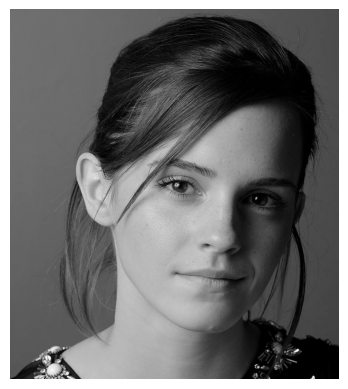

In [30]:
emma = cv2.imread('emma.jpg')
emma_grayscale=cv2.cvtColor(emma,cv2.COLOR_BGR2GRAY)

plt.imshow(emma_grayscale, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

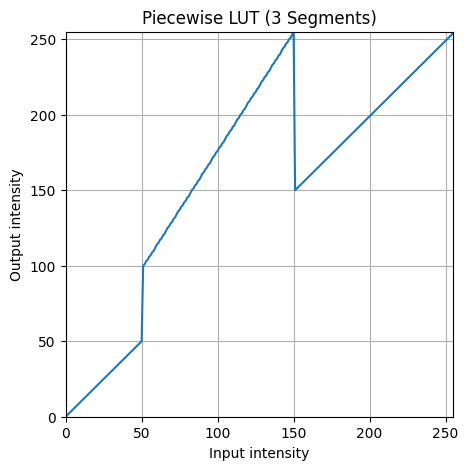

In [32]:
# Define piecewise transformation function
t1 = np.linspace(0,   50,  num=51,  dtype=np.uint8)   
t2 = np.linspace(100, 255, num=100, dtype=np.uint8)   
t3 = np.linspace(150, 255, num=105, dtype=np.uint8)

# Concatenate all segments to create the transformation array
transform = np.concatenate((t1, t2, t3))

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), transform)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Piecewise LUT (3 Segments)")
plt.show()

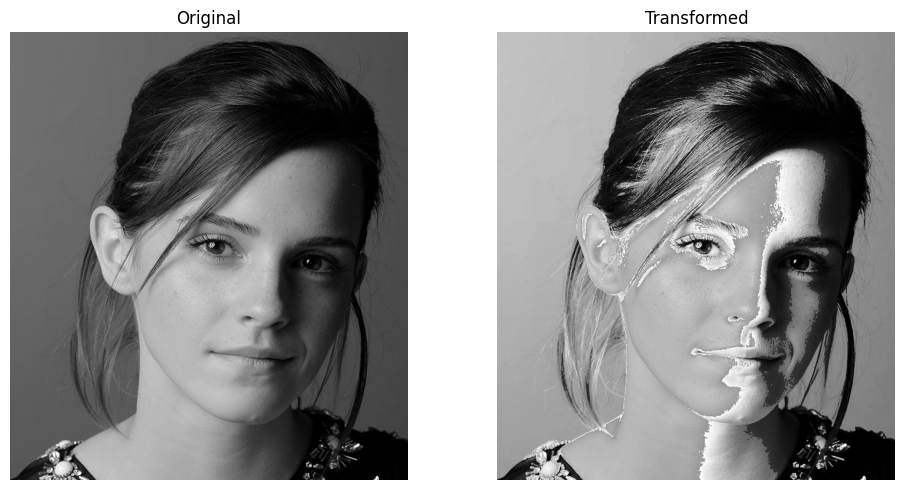

In [33]:
# generating the transformed image
emma_transformed = cv2.LUT(emma_grayscale, transform)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(emma_grayscale, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### Show the intensity transformations as a plots for the brain proton density image

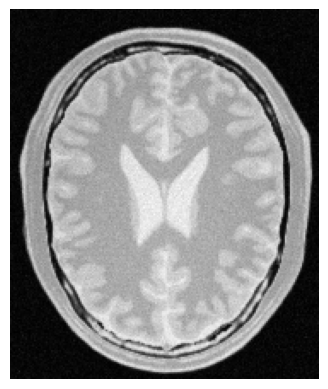

In [35]:
brain=cv2.imread('brain_proton_density_slice.png')
brain_gray=cv2.cvtColor(brain,cv2.COLOR_BGR2GRAY)

plt.imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In brain MRIs: 

    ** White matter is brighter (high intensity range) **

    ** Gray matter is mid-intensity range **

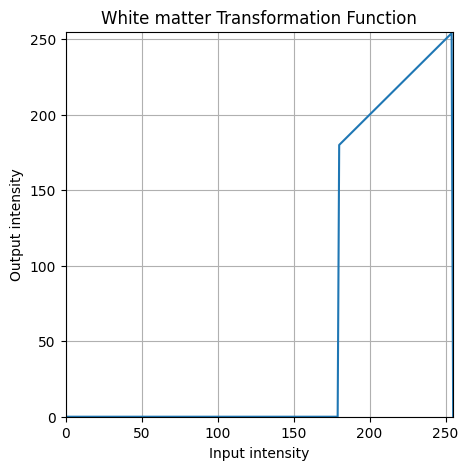

In [45]:
white_matter_start=180

t1=np.zeros(white_matter_start,dtype='uint8')
t2=np.linspace(180,256,num=76,dtype='uint8')

white_matter=np.concatenate((t1,t2))

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), white_matter)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("White matter Transformation Function")
plt.show()

### White Matter

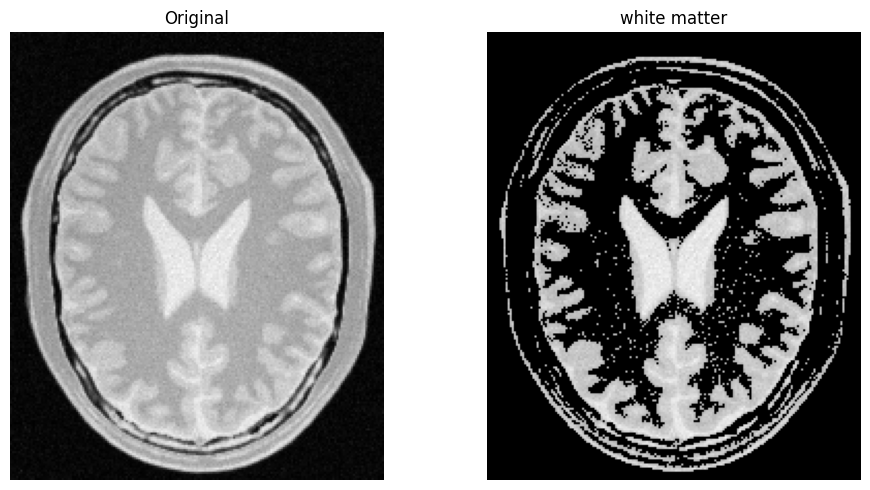

In [65]:
# generating the transformed image
brain_whiteMatter = cv2.LUT(brain_gray, white_matter)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(brain_whiteMatter, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('white matter')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### Gray Matter

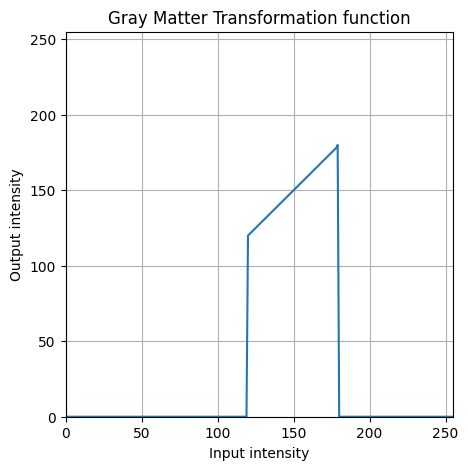

In [61]:
gray_matter_start=120
gray_matter_end=180


t1=np.zeros(120)
t2=np.linspace(gray_matter_start,gray_matter_end,num=60,dtype='uint8')
t3=np.zeros(76)

gray_matter=np.concatenate((t1,t2,t3))
gray_matter.shape


plt.figure(figsize=(5,5))
plt.plot(np.arange(256), gray_matter)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Gray Matter Transformation function")
plt.show()

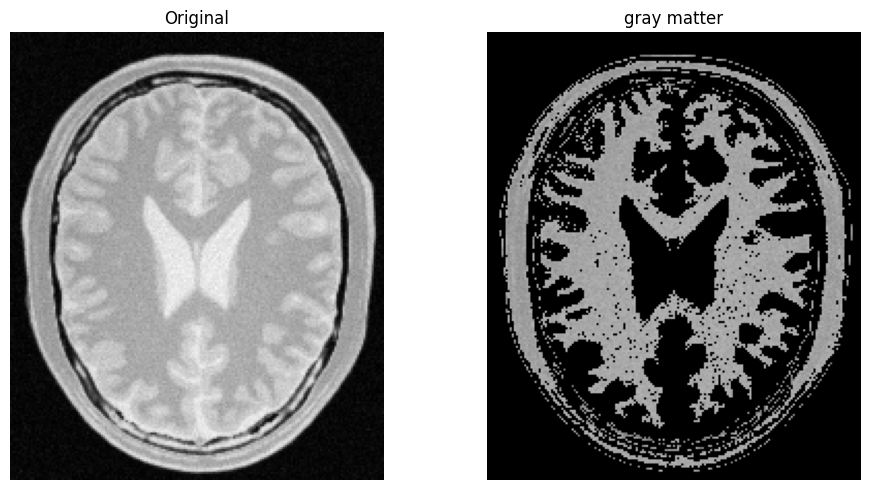

In [64]:
# generating the transformed image
brain_graymatter = cv2.LUT(brain_gray, gray_matter)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(brain_graymatter, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('gray matter')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### gamma correction

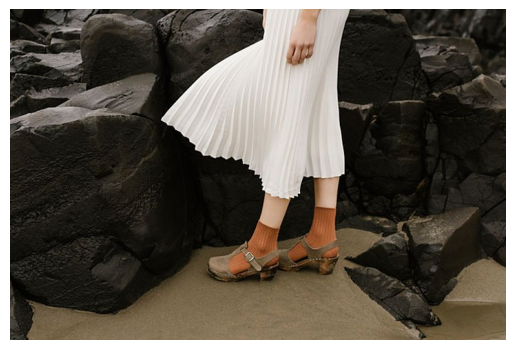

In [118]:
gamma_image = cv2.imread('highlights_and_shadows.jpg')

#converting to RGB colorspace
gamma_image_RGB=cv2.cvtColor(gamma_image,cv2.COLOR_BGR2RGB)

#converting to L∗a∗b∗ color space
gamma_lab= cv2.cvtColor(gamma_image, cv2.COLOR_BGR2Lab)
L,a,b=cv2.split(gamma_lab)

plt.imshow(gamma_image_RGB)
plt.axis('off')
plt.show()

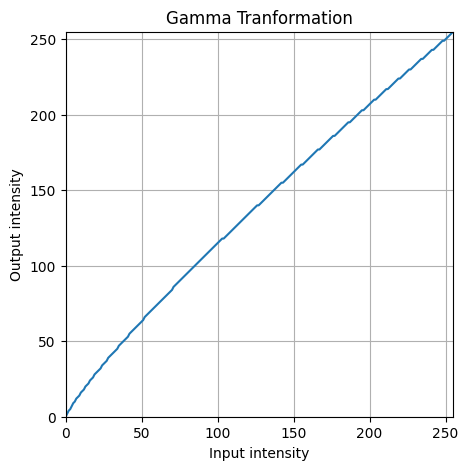

In [119]:
gamma = 0.85
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)],dtype='uint8')

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), t)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Gamma Tranformation")
plt.show()

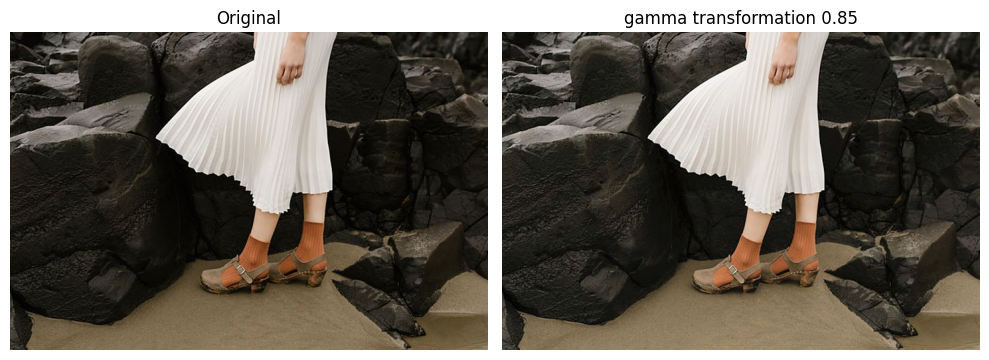

In [120]:
ModifiedL = cv2.LUT(L, t)

# Merge the channels
gamma_merged = cv2.merge([ModifiedL, a, b])

gamma_modified = cv2.cvtColor(gamma_merged, cv2.COLOR_LAB2RGB)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(gamma_image_RGB)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(gamma_modified)
axes[1].set_title(f'gamma transformation {gamma}')
axes[1].axis("off")


plt.tight_layout()
plt.show()

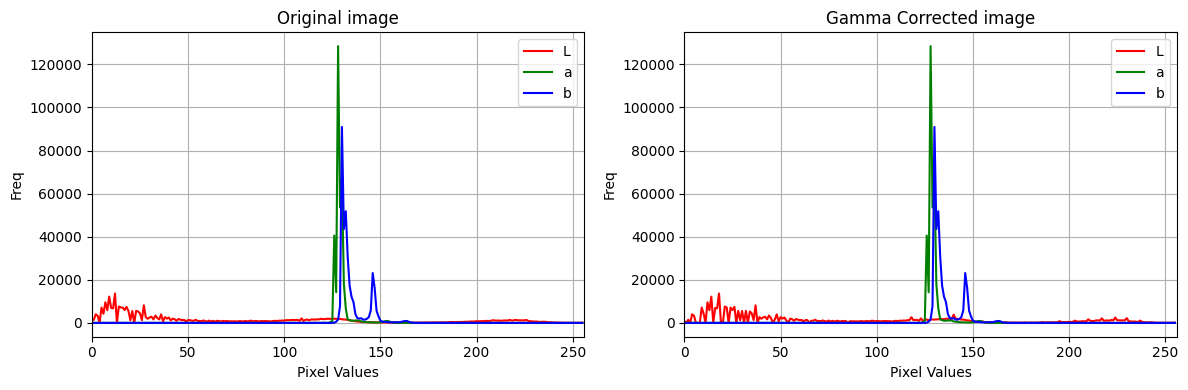

In [124]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

LAB_names = ('L', 'a', 'b')
plot_colors = ('r', 'g', 'b')  


for i, (name, color) in enumerate(zip(LAB_names, plot_colors)):
    # Original
    hist_orig = cv2.calcHist([gamma_lab], [i], None, [256], [0, 256])
    ax[0].plot(hist_orig, color=color, label=name)

    # Corrected
    hist_gamma = cv2.calcHist([gamma_merged], [i], None, [256], [0, 256])
    ax[1].plot(hist_gamma, color=color, label=name)


for a, title in zip(ax, ('Original image', 'Gamma Corrected image')):
    a.set_title(title)
    a.set_xlabel('Pixel Values')
    a.set_ylabel('Freq')
    a.set_xlim(0, 256)
    a.grid(True)
    a.legend()

plt.tight_layout()
plt.show()


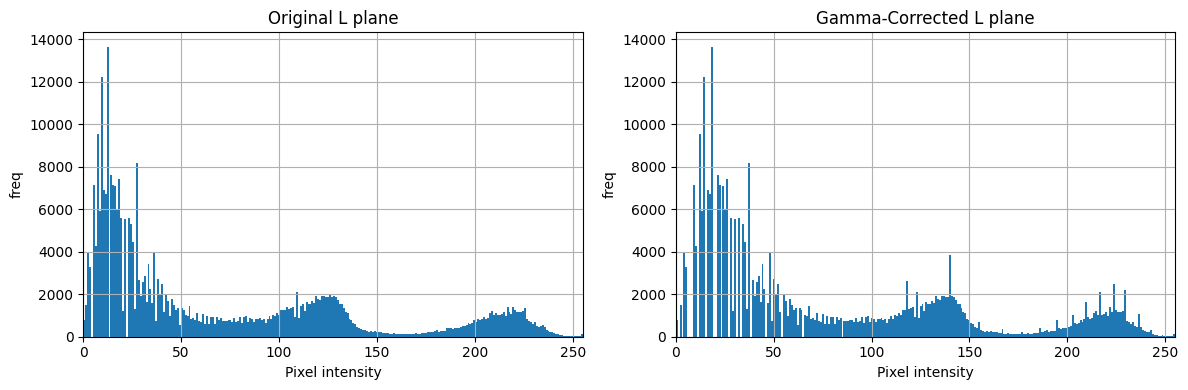

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Original L
ax[0].hist(L.ravel(), bins=256, range=(0, 255))
ax[0].set_title('Original L plane')
ax[0].set_xlabel('Pixel intensity')
ax[0].set_ylabel('freq')
ax[0].set_xlim(0, 255)
ax[0].grid(True)

# Corrected L
ax[1].hist(ModifiedL.ravel(), bins=256, range=(0, 255))
ax[1].set_title('Gamma-Corrected L plane')
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('freq')
ax[1].set_xlim(0, 255)
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Increasing the vibrance of a photograph

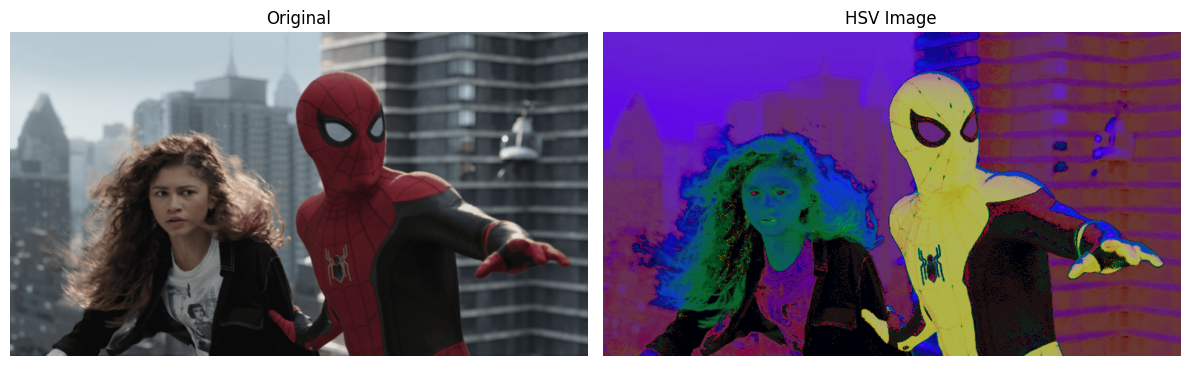

In [140]:
# Import Emma image
spiderman = cv2.imread('spider.png')


spiderman_HSV = cv2.cvtColor(spiderman, cv2.COLOR_BGR2HSV)
spiderman_RGB = cv2.cvtColor(spiderman, cv2.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv2.split(spiderman_HSV)

fig, axs = plt.subplots(1, 2, figsize=(12, 8))


axs[0].imshow(spiderman_RGB)
axs[0].set_title('Original')
axs[0].axis('off')  


axs[1].imshow(spiderman_HSV)
axs[1].set_title('HSV Image')
axs[1].axis('off')  

# Show the plot
plt.tight_layout()
plt.show()

In [150]:
a=0.7
def vibrance(a=a, mu=128.0, sigma=70.0):
    
    x = np.arange(256, dtype=np.float32)
    bump = a * 128.0 * np.exp(-((x - mu) ** 2) / (2.0 * (sigma ** 2)))
    f = x + bump
    f = np.clip(f, 0, 255).astype(np.uint8)
    return x, f


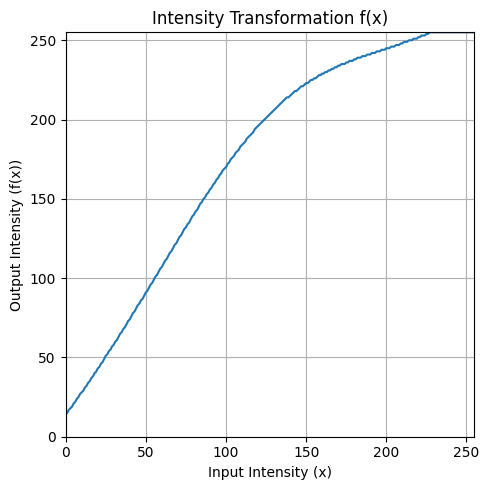

In [151]:
# Build LUT
x, transformation = vibrance()

# Plot
plt.figure(figsize=(5,5))
plt.plot(x, f)
plt.title('Intensity Transformation f(x)')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.tight_layout()
plt.show()


In [152]:
# Apply transformation to Saturation plane
S_modified = cv2.LUT(S, transformation)

# Merge
merged = cv2.merge([H, S_modified, V])
spider_modified = cv2.cvtColor(merged, cv2.COLOR_HSV2RGB)

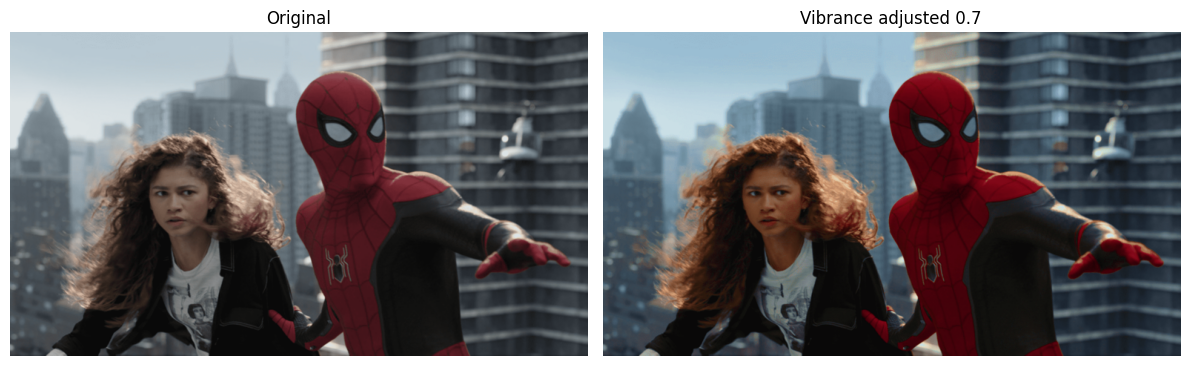

In [153]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(spiderman_RGB)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title(f'Vibrance adjusted {a}')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

### Question5

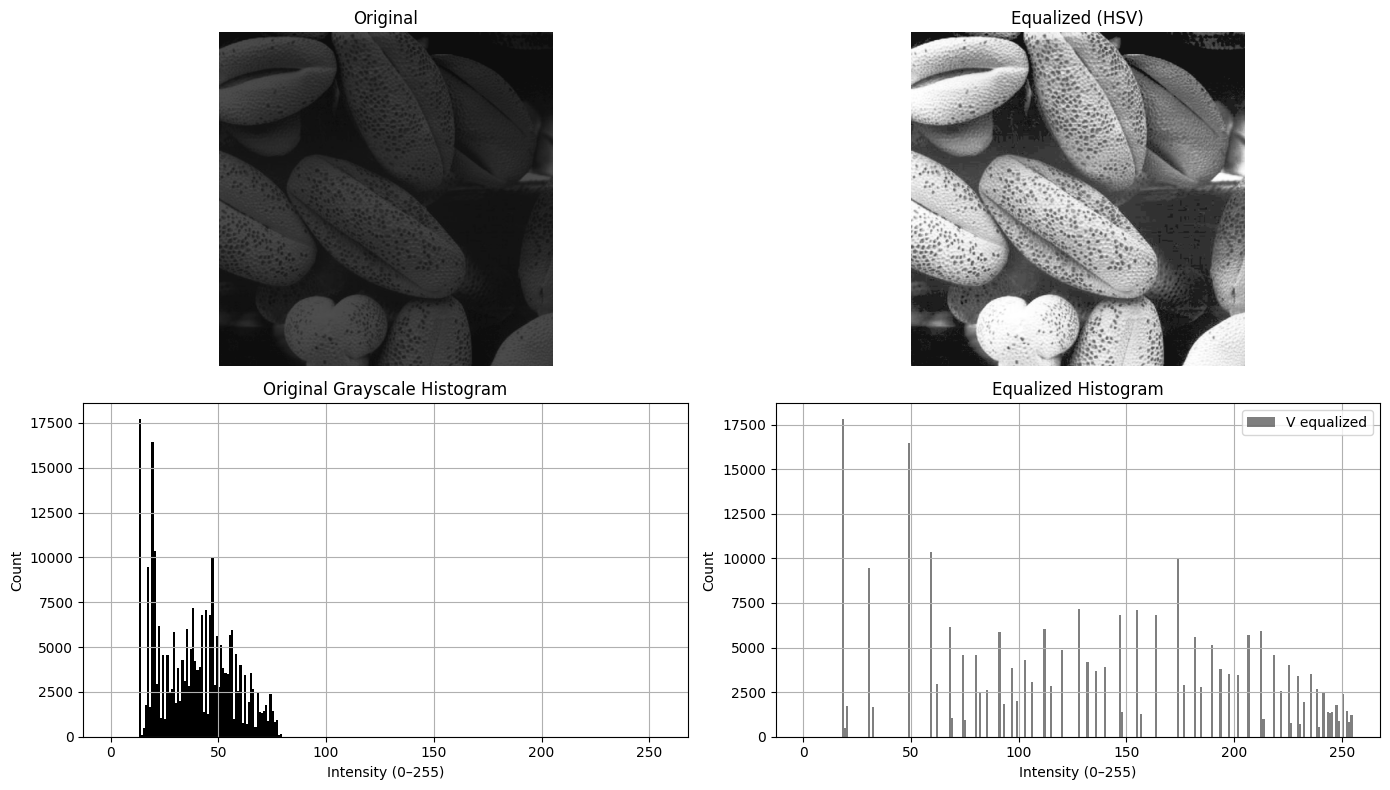

In [176]:
shells = cv2.imread('shells.tif')
shells_GRAY=cv2.cvtColor(shells,cv2.COLOR_BGR2GRAY)
shells_RGB=cv2.cvtColor(shells,cv2.COLOR_BGR2RGB)
shells_HSV=cv2.cvtColor(shells,cv2.COLOR_BGR2HSV)
H,S,V=cv2.split(shells_HSV)


def my_histogram_equalization(img_gray: np.ndarray) -> np.ndarray:
    # Manual hist-eq for uint8 grayscale
    flat = img_gray.ravel()
    hist = np.bincount(flat, minlength=256)
    cdf  = np.cumsum(hist).astype(np.float64)
    cdf /= cdf[-1]                    # normalize to [0,1]
    lut  = np.round(cdf * 255).astype(np.uint8)
    return lut[flat].reshape(img_gray.shape)


V_eq = my_histogram_equalization(V)
hsv_eq = cv2.merge([H, S, V_eq])
rgb_eq_hsv = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)


fig, ax = plt.subplots(2, 2, figsize=(14, 8))

# Images
ax[0,0].imshow(shells_RGB)
ax[0,0].set_title('Original')     
ax[0,0].axis('off')


ax[0,1].imshow(rgb_eq_hsv)
ax[0,1].set_title('Equalized (HSV)')
ax[0,1].axis('off')

# Histograms(HSV)
ax[1,1].hist(V_eq.ravel(), bins=256, range=(0,255), alpha=0.5, label='V equalized',color='black')
ax[1,1].set_title('Equalized Histogram')
ax[1,1].set_xlabel('Intensity (0–255)'); ax[1,1].set_ylabel('Count'); ax[1,1].grid(True); ax[1,1].legend()

#original grayscale histogram for reference
ax[1,0].hist(shells_GRAY.ravel(), bins=256, range=(0,255), color='black')
ax[1,0].set_title('Original Grayscale Histogram')
ax[1,0].set_xlabel('Intensity (0–255)'); ax[1,0].set_ylabel('Count'); ax[1,0].grid(True)

plt.tight_layout()
plt.show()


###  histogram equalization only to the foreground of an image

In [238]:
jeniffer = cv2.imread('jeniffer.jpg')
jeniffer_RGB = cv2.cvtColor(jeniffer, cv2.COLOR_BGR2RGB)

jeniffer_HSV = cv2.cvtColor(jeniffer, cv2.COLOR_BGR2HSV)       # Convert the image into HSV color space
h_channel, s_channel, v_channel = cv2.split(jeniffer_HSV)     # Split the converted image into hue, saturation and value planes

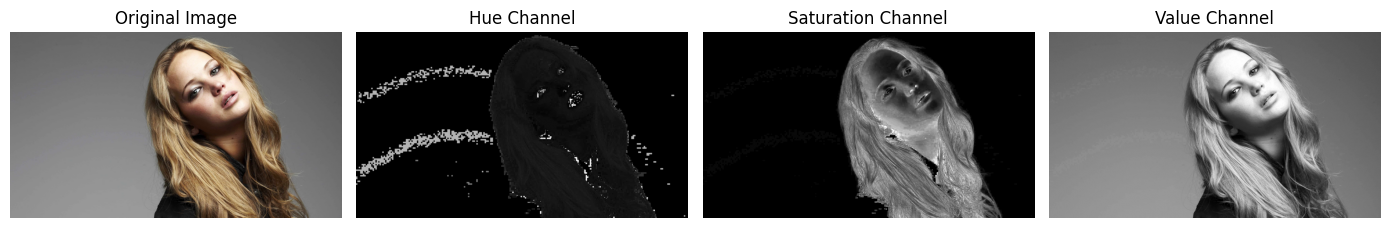

In [239]:
#region
plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.imshow(jeniffer_RGB, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Displaying each separate plane in gray scale
plt.subplot(142)
plt.imshow(h_channel, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(s_channel, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(v_channel, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()
#endregion

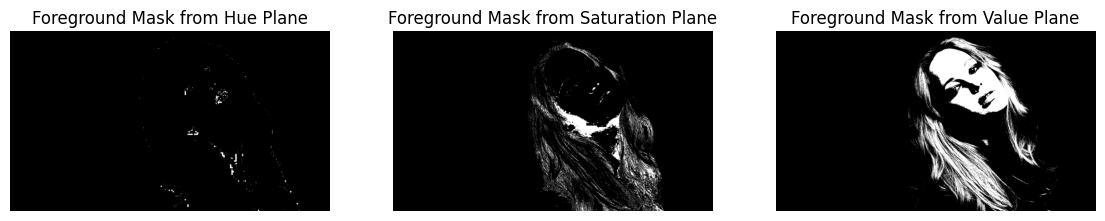

In [240]:
# Select a threshold value randomly
threshold = 160


# Apply thresholding on three channels seperately
ret1, foreground_mask1 = cv2.threshold(h_channel, threshold, 255, cv2.THRESH_BINARY)
ret2, foreground_mask2 = cv2.threshold(s_channel, threshold, 255, cv2.THRESH_BINARY)
ret3, foreground_mask3 = cv2.threshold(v_channel, threshold, 255, cv2.THRESH_BINARY)

#region
plt.figure(figsize=(14,6))

plt.subplot(131)
plt.imshow(foreground_mask1, cmap='gray')
plt.title('Foreground Mask from Hue Plane')
plt.axis('off')

plt.subplot(132)
plt.imshow(foreground_mask2, cmap='gray')
plt.title('Foreground Mask from Saturation Plane')
plt.axis('off')

plt.subplot(133)
plt.imshow(foreground_mask3, cmap='gray')
plt.title('Foreground Mask from Value Plane')
plt.axis('off')

plt.show()


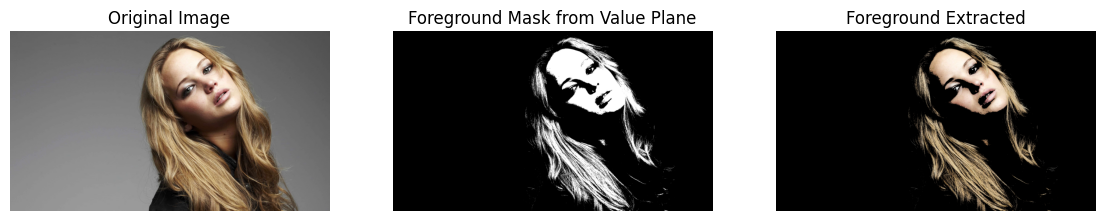

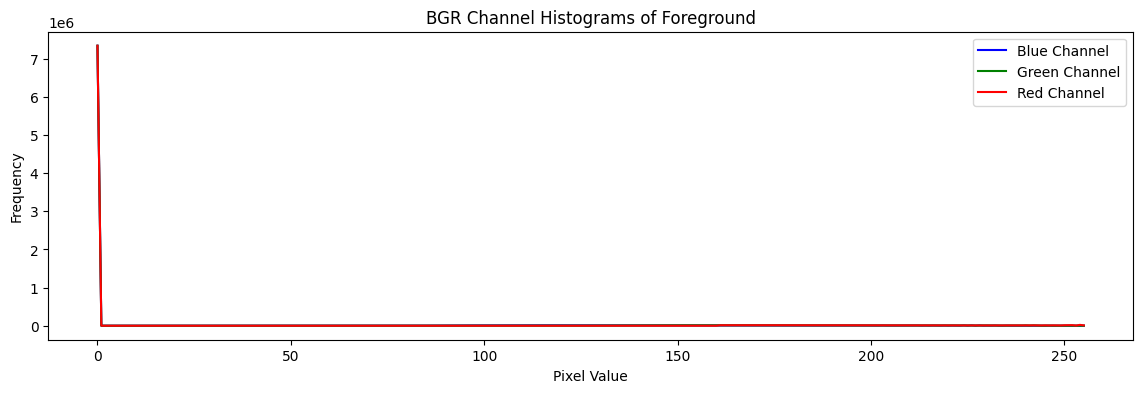

In [241]:

# Extract foreground 
foreground_img = cv2.bitwise_and(jeniffer, jeniffer, mask=foreground_mask3)

# Show original, mask, and foreground
plt.figure(figsize=(14, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(jeniffer, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(foreground_mask3, cmap='gray')
plt.title('Foreground Mask from Value Plane')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(foreground_img, cv2.COLOR_BGR2RGB))
plt.title('Foreground Extracted')
plt.axis('off')

plt.show()

# Compute histograms for B, G, R channels of the foreground 
colors = ('blue', 'green', 'red')
plt.figure(figsize=(14, 4))

for i, col in enumerate(colors):
    hist = cv2.calcHist([foreground_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{col.capitalize()} Channel')

plt.title('BGR Channel Histograms of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


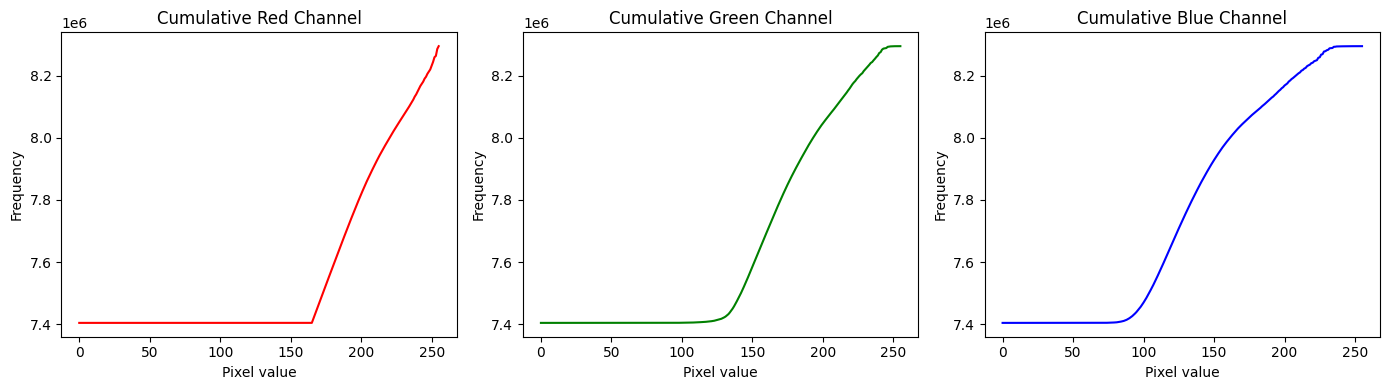

In [ ]:
# Compute histograms for each channel
b_hist = cv2.calcHist([foreground_img], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([foreground_img], [1], None, [256], [0, 256])
r_hist = cv2.calcHist([foreground_img], [2], None, [256], [0, 256])

# Obtain cumulative sums 
cumulative_hist_b = np.cumsum(b_hist)
cumulative_hist_g = np.cumsum(g_hist)
cumulative_hist_r = np.cumsum(r_hist)

# Plot cumulative histograms 
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(cumulative_hist_r, color='red')
plt.title('Cumulative Red Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(cumulative_hist_g, color='green')
plt.title('Cumulative Green Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(cumulative_hist_b, color='blue')
plt.title('Cumulative Blue Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


In [201]:
def eq_with_mask_uint8(channel: np.ndarray, mask: np.ndarray) -> np.ndarray:
    
    out = channel.copy()
    fg = channel[mask == 255]
    if fg.size == 0:
        return out
    hist = np.bincount(fg, minlength=256).astype(np.float64)
    pdf  = hist / hist.sum()
    cdf  = np.cumsum(pdf)
    lut  = np.round(cdf * 255).astype(np.uint8)
    out[mask == 255] = lut[fg]
    return out

# Equalize the FOREGROUND
hsv = cv2.cvtColor(jeniffer, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

V_eq = eq_with_mask_uint8(V, foreground_mask3)           # equalize Value only on foreground
hsv_eq = cv2.merge([H, S, V_eq])
eq_rgb  = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)  # color-preserving equalized image
orig_rgb = cv2.cvtColor(jeniffer, cv2.COLOR_BGR2RGB)


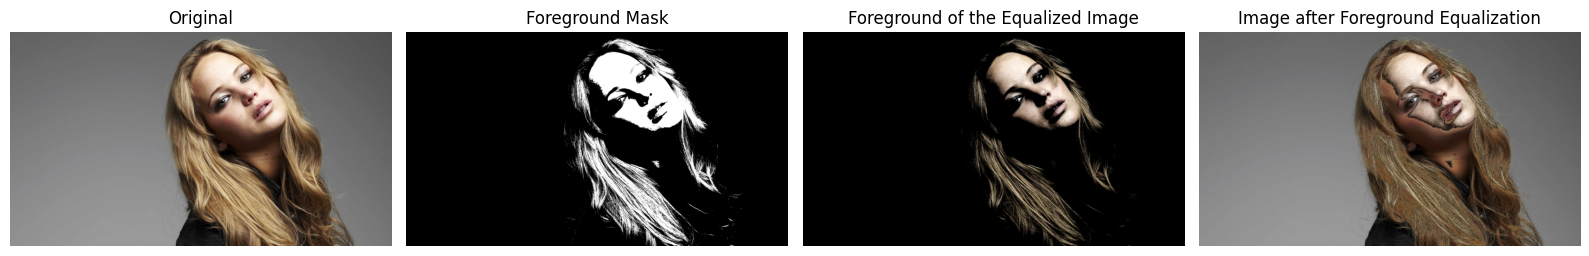

In [204]:

bg_mask = cv2.bitwise_not(foreground_mask3)

# background from original
background_rgb = cv2.bitwise_and(orig_rgb, orig_rgb, mask=bg_mask)

# foreground from equalized image
foreground_rgb = cv2.bitwise_and(eq_rgb, eq_rgb, mask=foreground_mask3)

# combine
composite_rgb = cv2.add(foreground_rgb, background_rgb)



# Show results
fig, ax = plt.subplots(1, 4, figsize=(16,4))
ax[0].imshow(orig_rgb);        ax[0].set_title("Original");            ax[0].axis("off")
ax[1].imshow(foreground_mask3, cmap='gray'); ax[1].set_title("Foreground Mask");   ax[1].axis("off")
ax[2].imshow(foreground_rgb);  ax[2].set_title("Foreground of the Equalized Image"); ax[2].axis("off")
ax[3].imshow(composite_rgb);   ax[3].set_title("Image after Foreground Equalization");     ax[3].axis("off")
plt.tight_layout(); plt.show()

### Filtering with the Sobel operator

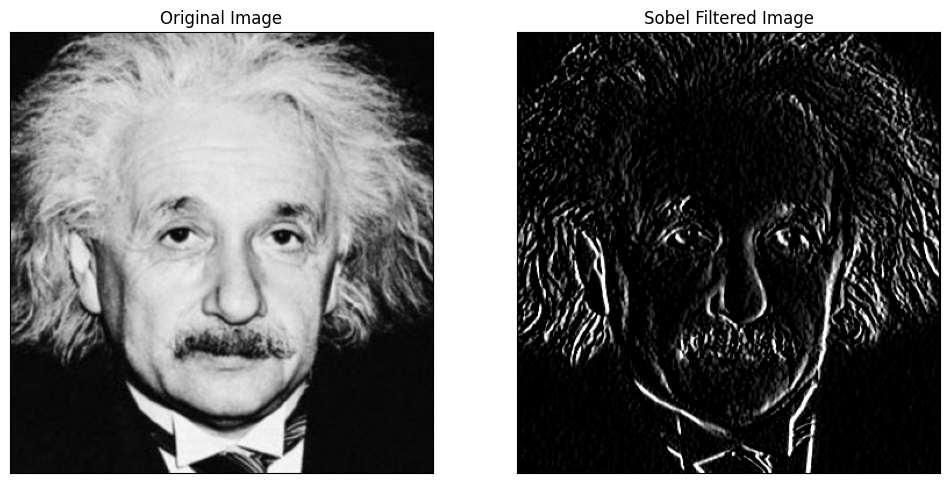

In [228]:
img = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)


# Sobel kernel for edge detection in the x-direction
sobel_kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
], dtype='float')

# Apply the Sobel filter using filter2D
img_filt = cv2.filter2D(img, -1, sobel_kernel)

# Plot the original and filtered images
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 12))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(img_filt, cmap='gray')
ax[1].set_title('Sobel Filtered Image')
ax[1].set_xticks([]), ax[1].set_yticks([])  

plt.show()


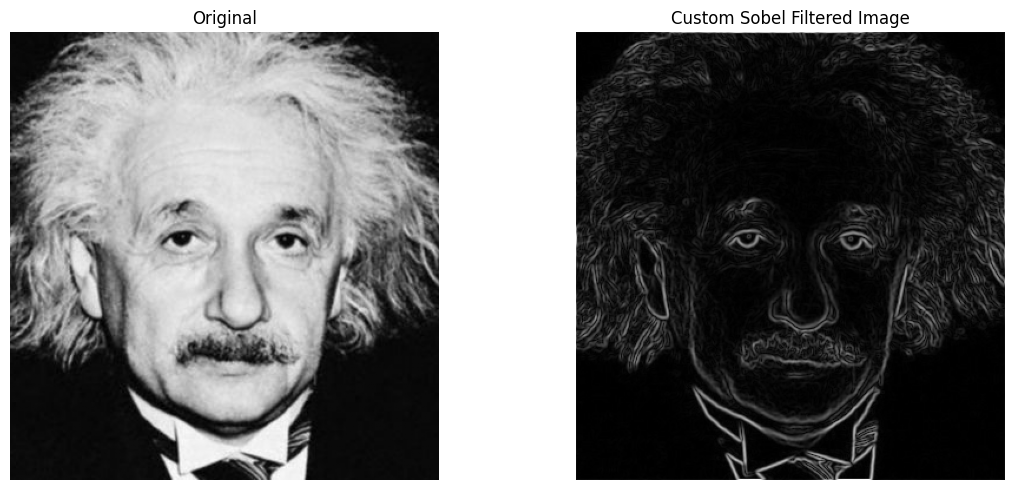

In [215]:
#define Sobel kernels
Sx = np.array([[ 1, 0,-1],
               [ 2, 0,-2],
               [ 1, 0,-1]], dtype=np.float32)   

Sy = np.array([[ 1,  2,  1],
               [ 0,  0,  0],
               [-1, -2, -1]], dtype=np.float32)  

def convolve2d_same(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    
    kh, kw = kernel.shape
    ph, pw = kh // 2, kw // 2
    padded = np.pad(image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)
    out = np.zeros_like(image, dtype=np.float32)

    # flip kernel 
    k = np.flipud(np.fliplr(kernel))

    H, W = image.shape
    for y in range(H):
        ys = y
        ye = y + kh
        for x in range(W):
            xs = x
            xe = x + kw
            region = padded[ys:ye, xs:xe]
            out[y, x] = np.sum(region * k)
    return out

# apply Sobel 
Gx = convolve2d_same(img, Sx)
Gy = convolve2d_same(img, Sy)

# gradient magnitude
G = np.hypot(Gx, Gy)  

#normalize to uint8 for display
def to_uint8(a):
    a = np.clip(a, 0, None)             
    a = a / (a.max() + 1e-8) * 255.0
    return a.astype(np.uint8)

Gx_u8 = to_uint8(np.abs(Gx))
Gy_u8 = to_uint8(np.abs(Gy))
G_u8  = to_uint8(G)


fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax[0].imshow(img.astype(np.uint8), cmap='gray'); ax[0].set_title('Original'); ax[0].axis('off')
ax[1].imshow(G_u8,  cmap='gray');               ax[1].set_title('Custom Sobel Filtered Image'); ax[1].axis('off')
plt.tight_layout(); plt.show()


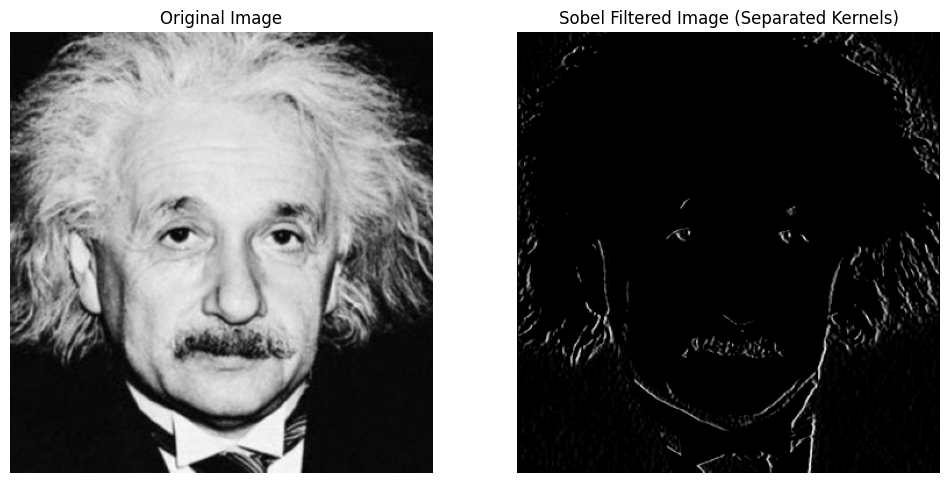

In [216]:
# Define 1D kernels from the separability property
column_kernel = np.array([[1], [2], [1]], dtype=np.float32)   # vertical smoothing
row_kernel = np.array([[1, 0, -1]], dtype=np.float32)         # horizontal edge detection

# Convolve with the column kernel
conv_vertical = cv2.filter2D(img, -1, column_kernel)

#Convolve result with the row kernel
conv_sobel = cv2.filter2D(conv_vertical, -1, row_kernel)

# Show results
fig, axes  = plt.subplots(1, 2, figsize=(12, 12), sharex=True, sharey=True)

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(conv_sobel, cmap='gray')
axes[1].set_title('Sobel Filtered Image (Separated Kernels)')
axes[1].axis('off')

plt.show()


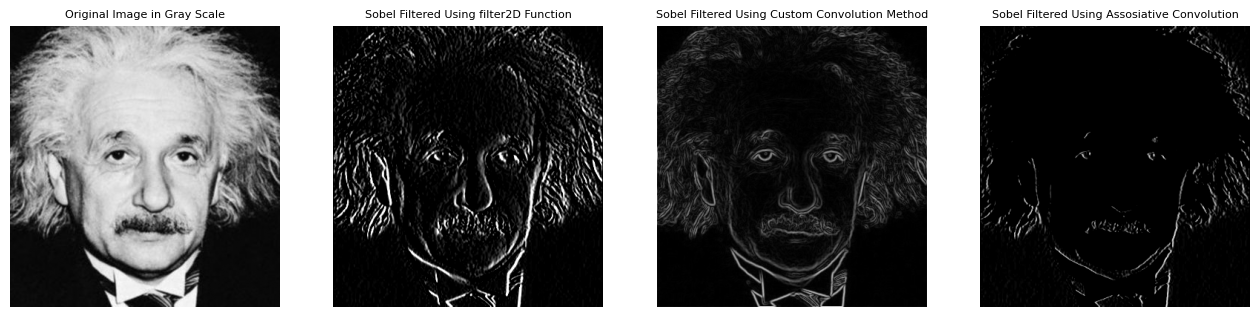

In [217]:

plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title('Original Image in Gray Scale', fontsize=8)
plt.axis('off')

plt.subplot(142)
plt.imshow(img_filt, cmap='gray')
plt.title('Sobel Filtered Using filter2D Function', fontsize=8)
plt.axis('off')

plt.subplot(143)
plt.imshow(G_u8, cmap='gray')
plt.title('Sobel Filtered Using Custom Convolution Method', fontsize=8)
plt.axis('off')

plt.subplot(144)
plt.imshow(conv_sobel, cmap='gray')
plt.title('Sobel Filtered Using Assosiative Convolution', fontsize=8)
plt.axis('off')

plt.show()

### Zoom Images By a givenfactor

In [219]:
from pathlib import Path

def ssd(a: np.ndarray, b: np.ndarray) -> int:
    
    a32, b32 = a.astype(np.float32), b.astype(np.float32)
    return int(np.sum((a32 - b32) ** 2))

def zoom_image_nn(img: np.ndarray, factor: float) -> np.ndarray:
    
    if not (0 < factor <= 10):
        raise ValueError("zoom factor must be in (0, 10].")

    H, W = img.shape[:2]
    C = 1 if img.ndim == 2 else img.shape[2]
    outH, outW = int(round(H * factor)), int(round(W * factor))

    # map output pixel centers back to source
    xs = (np.arange(outH, dtype=np.float32) + 0.5) / factor - 0.5
    ys = (np.arange(outW, dtype=np.float32) + 0.5) / factor - 0.5

    xi = np.clip(np.rint(xs).astype(np.int32), 0, H - 1)   # row indices
    yj = np.clip(np.rint(ys).astype(np.int32), 0, W - 1)   # col indices

    # gather with broadcasting (vectorized)
    if C == 1:
        out = img[xi][:, yj]
    else:
        out = img[xi][:, yj, :]

    return out




Zooming factor: 4.0
Original small: (270, 480, 3) | Zoomed: (1080, 1920, 3) | Big: (1080, 1920, 3)
SSD value between original and zoomed images: 847702528


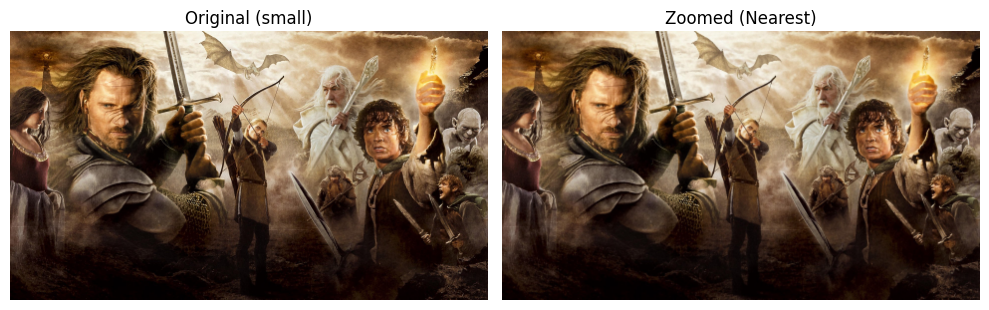

In [226]:

img_small = cv2.imread('a1q5images\\im01small.png', cv2.IMREAD_COLOR)

img_big   = cv2.imread('a1q5images\\im01.png', cv2.IMREAD_COLOR)

factor = 4.0
print(f"Zooming factor: {factor}")

zoomed = zoom_image_nn(img_small, factor)

print("Original small:", img_small.shape, "| Zoomed:", zoomed.shape, "| Big:", img_big.shape)

# If rounding makes sizes differ by 1px, resize zoomed only for SSD comparison
if zoomed.shape != img_big.shape:
    zoomed_for_ssd = cv2.resize(zoomed, (img_big.shape[1], img_big.shape[0]), interpolation=cv2.INTER_NEAREST)
else:
    zoomed_for_ssd = zoomed

print("SSD value between original and zoomed images:", ssd(img_big, zoomed_for_ssd))

# save & show
out_path = Path('nearest_neighbour_1.png')
cv2.imwrite(str(out_path), zoomed)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1); plt.imshow(cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)); plt.title('Original (small)'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(zoomed,    cv2.COLOR_BGR2RGB)); plt.title('Zoomed (Nearest)'); plt.axis('off')
plt.tight_layout(); plt.show()


Zooming factor: 4
Original small: (300, 480, 3) | Zoomed: (1200, 1920, 3)


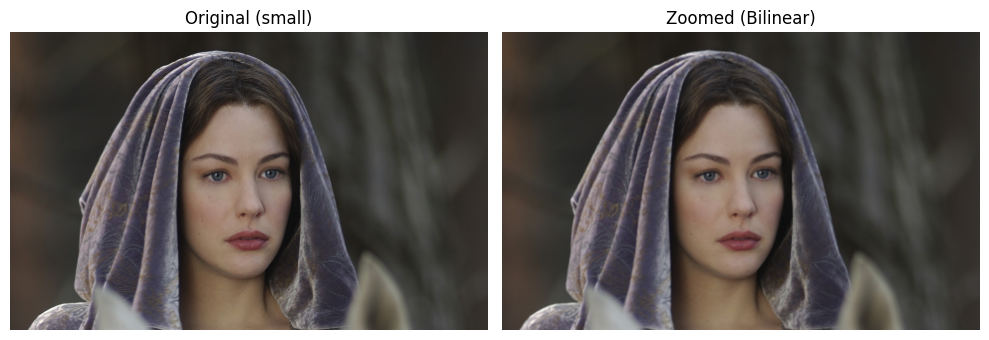

SSD value between original and zoomed images:  179225792


True

In [255]:
img_small = cv2.imread('a1q5images\\im02small.png', cv2.IMREAD_COLOR)
img_small_rgb = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)

def nssd(a, b):
    
    a32, b32 = a.astype(np.float32), b.astype(np.float32)
    return float(np.sum((a32 - b32) ** 2) / (a32.size * 255.0**2))

def zoom_bilinear(src, factor: float):
    
    if not (0 < factor <= 10):
        raise ValueError("zoom factor must be in (0, 10].")

    H, W, C = src.shape
    outH, outW = int(round(H * factor)), int(round(W * factor))
    out = np.zeros((outH, outW, C), dtype=np.float32)

    # center aligned: map output pixel centers back to source coordinates
    sy = (H - 1) / max(outH - 1, 1)
    sx = (W - 1) / max(outW - 1, 1)

    for i in range(outH):
        y = i * sy
        y0 = int(np.floor(y))
        y1 = min(y0 + 1, H - 1)
        wy = y - y0

        for j in range(outW):
            x = j * sx
            x0 = int(np.floor(x))
            x1 = min(x0 + 1, W - 1)
            wx = x - x0

            # four neighbors
            I00 = src[y0, x0].astype(np.float32)
            I01 = src[y0, x1].astype(np.float32)
            I10 = src[y1, x0].astype(np.float32)
            I11 = src[y1, x1].astype(np.float32)

            # bilinear blend
            top    = (1 - wx) * I00 + wx * I01
            bottom = (1 - wx) * I10 + wx * I11
            out[i, j] = (1 - wy) * top + wy * bottom

    return np.clip(out, 0, 255).astype(np.uint8)


factor = 4
print('Zooming factor:', factor)
zoomed = zoom_bilinear(img_small, factor)

print("Original small:", img_small.shape, "| Zoomed:", zoomed.shape)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1); plt.imshow(img_small_rgb); plt.title('Original (small)'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(cv2.cvtColor(zoomed, cv2.COLOR_BGR2RGB)); plt.title('Zoomed (Bilinear)'); plt.axis('off')
plt.tight_layout(); plt.show()

# compare to big
img_big = cv2.imread('a1q5images\\im02.png', cv2.IMREAD_COLOR)
if img_big is not None and img_big.shape != zoomed.shape:
    # align shapes only for metric reporting
    zoomed_for_metric = cv2.resize(zoomed, (img_big.shape[1], img_big.shape[0]), interpolation=cv2.INTER_LINEAR)
else:
    zoomed_for_metric = zoomed

if img_big is not None:
    print("SSD value between original and zoomed images: ", ssd(img_big, zoomed_for_metric))

cv2.imwrite('im04_bilinear_zoom_unique.png', zoomed)


### Segmentation

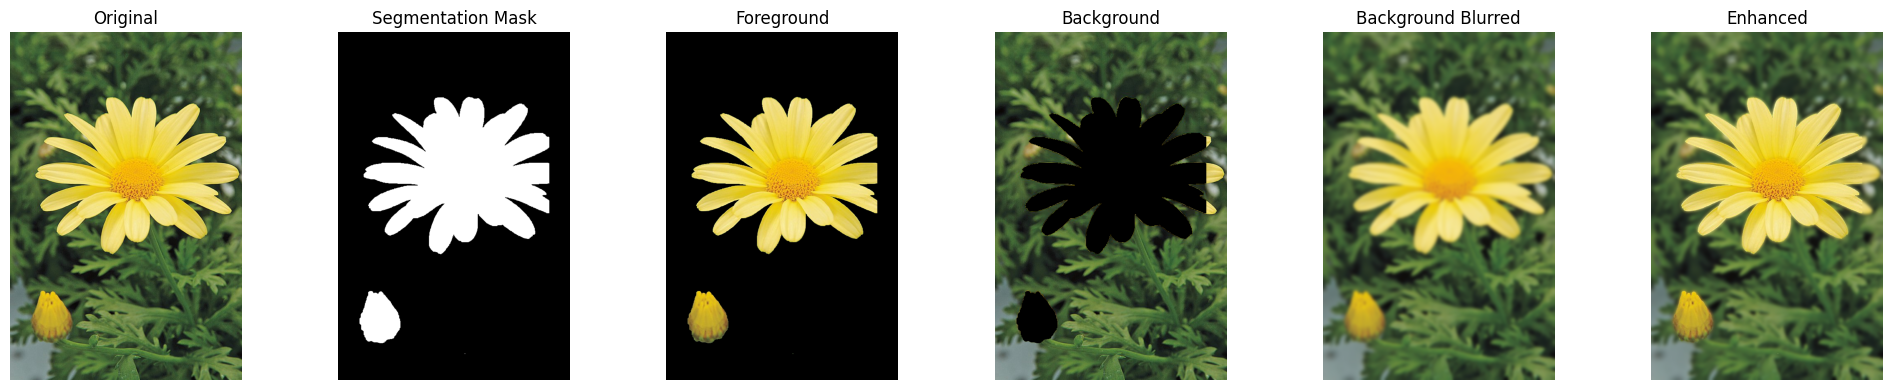

In [261]:
img = cv2.imread('daisy.jpg', cv2.IMREAD_COLOR)
H, W = img.shape[:2]


mask = np.zeros((H, W), np.uint8)         
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)


rect = (50, 50, max(W-100,1), max(H-100,1))
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Binary foreground mask 
fg_mask = np.where((mask==cv2.GC_FGD) | (mask==cv2.GC_PR_FGD), 1, 0).astype(np.uint8)

#Layers
foreground = img * fg_mask[..., None]
background = img * (1 - fg_mask)[..., None]

# Blur the whole image, then replace ONLY background pixels 
blurred = cv2.GaussianBlur(img, (21,21), 0)
enhanced_hard = img.copy()
enhanced_hard[fg_mask==0] = blurred[fg_mask==0]   # sharp subject, blurred bg


feather = cv2.GaussianBlur((fg_mask*255), (9,9), 0).astype(np.float32)/255.0
alpha = feather[..., None]                       
enhanced_soft = (alpha*img.astype(np.float32) + (1-alpha)*blurred.astype(np.float32)).astype(np.uint8)

# --- Plot cleanly ---
fig, ax = plt.subplots(1, 6, figsize=(20,4))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));           ax[0].set_title('Original');           ax[0].axis('off')
ax[1].imshow(fg_mask*255, cmap='gray');                     ax[1].set_title('Segmentation Mask');  ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB));    ax[2].set_title('Foreground');         ax[2].axis('off')
ax[3].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB));    ax[3].set_title('Background');         ax[3].axis('off')
ax[4].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB));       ax[4].set_title('Background Blurred'); ax[4].axis('off')
ax[5].imshow(cv2.cvtColor(enhanced_hard, cv2.COLOR_BGR2RGB)); ax[5].set_title('Enhanced');            ax[5].axis('off')

plt.tight_layout(); plt.show()

